In [4]:
import sklearn as sk
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

print('scikit-learn version:', sk.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

scikit-learn version: 0.24.1
numpy version: 1.20.1
matplotlib version: 3.3.4
seaborn version: 0.11.1


In [7]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

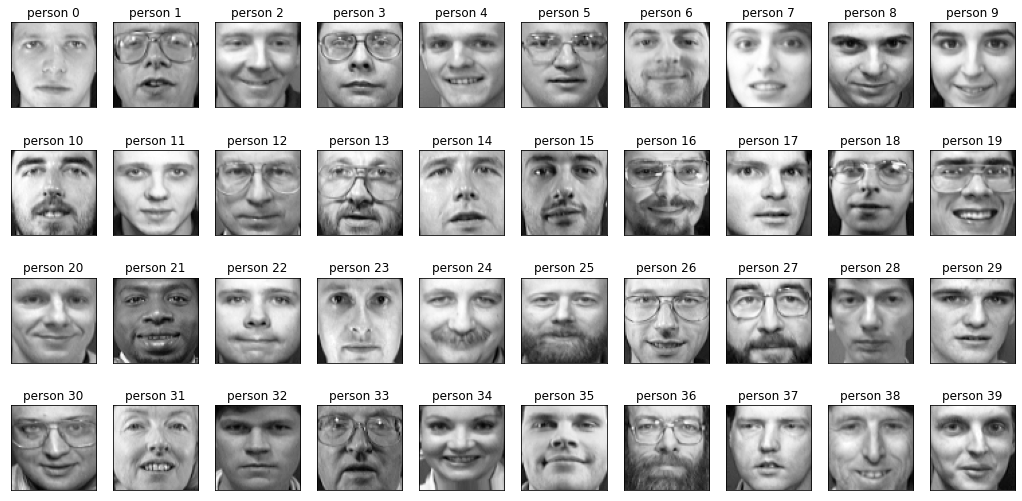

In [10]:
_, subplots = plt.subplots(nrows = 4, ncols = 10, figsize = (18, 9)) #this creates a 4x10 grid with the size of 18 units x 9 units
subplots = subplots.flatten() #this flattens the plot into one dimensional array which makes it easier to iterate

for id in np.unique(faces.target):
    index = id *10 # Because there are 10 images per person.
    subplots[id].imshow(faces.images[index], cmap = "gray") #grayscale colormap
    subplots[id].set_xticks([])
    subplots[id].set_yticks([])
    subplots[id].set_title("person " + str(id))

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=.3, stratify=faces.target)

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [38]:
pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9166666666666666


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred, zero_division = 0))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      0.67      0.80         3
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       0.75      1.00      0.86         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      0.67      0.80         3
          17       1.00    

In [31]:
#precision- someone else gets indentified as them   39
#recall- they get identified as someone else    0,25 and 34

<AxesSubplot:>

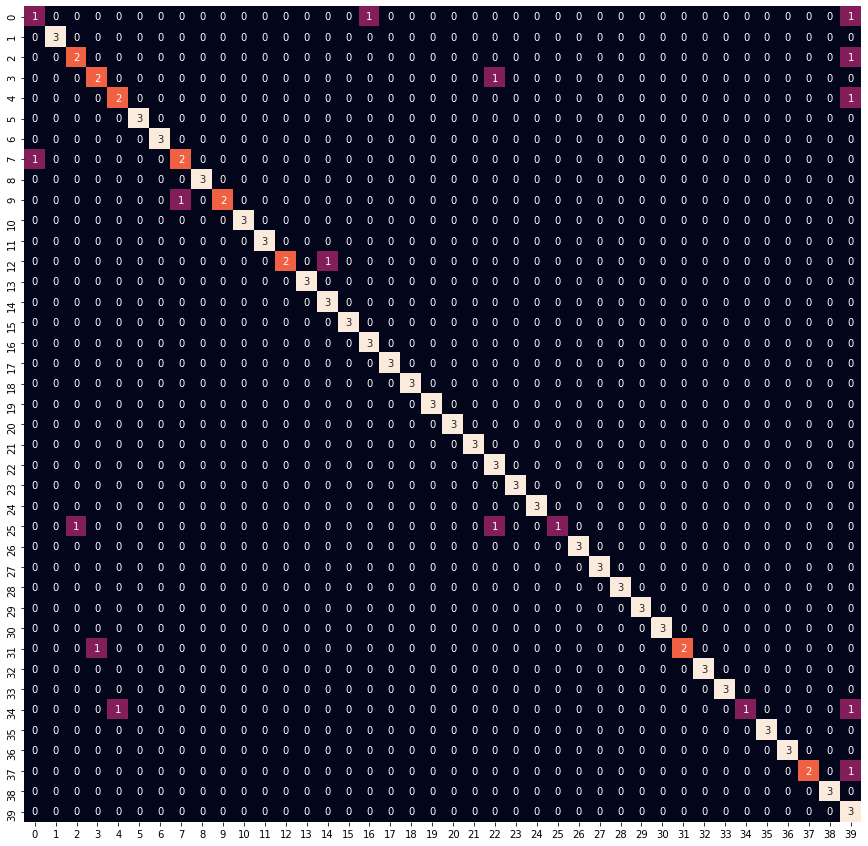

In [16]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, pred)
plt.figure(figsize = (15, 15))
sns.heatmap(matrix, annot = True, cbar = None, vmax = 3)

In [10]:
#max correct result 3
#others contain other id they get recognised as